# Ajuste de curvas

A regressão linear permite encontrar a melhor reta que se ajusta a um conjunto de pontos fornecidos.

Veremos agora como ajustar o conjunto de pontos no caso de modelo **não-lineares**.

* Linearização de modelos não-lineares
  * Linearização da equação de potência
  * Linearização da equação y = ax/(b+x)

## Linearização da equação de potência

De forma análoga, podemos linearizar a equação de potência simples:

\begin{equation}
y = \alpha x^\beta
\end{equation}

aplicando o logaritmico em ambos os lados:

\begin{equation}
ln(y) = ln(\alpha) +  \beta\ln(x)
\end{equation}

que também apresenta a equação de uma reta:

\begin{equation}
Y = \theta_0 +  \theta_1X
\end{equation}

onde $Y = ln(y)$, $\theta_0 = \ln(\alpha)$, $\theta_1 = \beta$ e $X = \ln(x)$


## Exemplo

[CHAPRA, Métodos numéricos aplicados com MATLAB]

Ajuste a equação de potência para os dados abaixo:

\begin{array}{|c|c|} \hline
x_i & y_i \\ \hline
 10 & 25  \\
 20 & 70  \\
 30 & 380  \\
 40 & 550 \\ 
 50 & 610 \\
 60 & 1220 \\
 70 & 830 \\
 80 & 1450 \\ \hline
 \end{array}

LinregressResult(slope=1.9841762557640135, intercept=-1.2941260499535616, rvalue=0.9736803105754778, pvalue=4.468581748614249e-05, stderr=0.18961252408684837, intercept_stderr=0.6991656056262293)
alpha = 0.27413734201322043 e beta = 1.9841762557640135


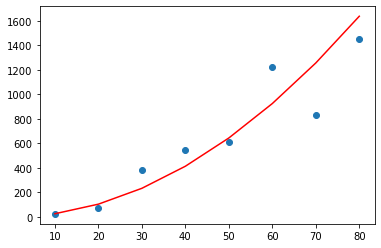

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

x = np.array([ 10,20,30,40,50,60,70,80])
y = np.array([25,70,380,550,610,1220,830,1450])

Y = np.log(y)
X = np.log(x)

modelo = stats.linregress(X, Y)

print(modelo)

alpha = np.exp(modelo.intercept)
beta = modelo.slope

print(f'alpha = {alpha} e beta = {beta}')

plt.scatter(x, y)
x_modelo = np.linspace(0.0, x[-1])
y_modelo = alpha*x**beta
plt.plot(x, y_modelo,'r')

# Exercício

Os dados abaixo estão relacionados com a equação do tipo $y(x) = ax^n$.

\begin{array}{|c|c|} \hline
x & y \\ \hline
2.0  &  8.3 \\
4.0  &  30.0 \\
6.0  &  72.3 \\
8.0  &  128.4 \\
10.0  &  200.6 \\
12.0  &  287.6 \\
14.0  &  391.2 \\
16.0  &  513.3 \\
18.0  &  648.1 \\
20.0  &  799.5 \\ \hline
\end{array}

1. Estime os valores de $a$ e $n$ utilizando o método dos mínimos quadrados.
2. Plote o gráfico de dispersão dos pontos originais.
3. Plote o gráfico da curva $y(x) = ax^n$ estimada.
4. Estime o valor de $y$ para $x = 15$.

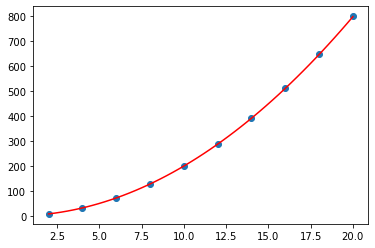

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Dados de entrada
x = np.array([2,4,6,8,10,12,14,16,18,20])
y = np.array([8.3, 30, 72.3, 128.4, 200.6, 287.6, 391.2, 513.3, 648.1, 799.5])

# Linearização do modelo
Yrl = np.log(y)
Xrl = np.log(x)

# Regressão linear
modelo = stats.linregress(Xrl, Yrl)

# Ajuste para o modelo não-linear
a = np.exp(modelo.intercept)
n = modelo.slope

# Plotando os resultados
plt.scatter(x,y)
xp = np.linspace(2,20)
yp = a*xp**n
plt.plot(xp,yp,'r')

## Linearização da equação y = ax/(b+x)

Outro exemplo de modelo não-linear é a equação:

\begin{equation}
y = \alpha \dfrac{x}{\beta + x}
\end{equation}

Neste caso, podemos inverter os termos e obter:

\begin{equation}
\dfrac{1}{y} = \dfrac{1}{\alpha} + \dfrac{\beta}{\alpha x}
\end{equation}

que corresponde à equação linear:

\begin{equation}
Y = \theta_0 + \theta_1X
\end{equation}

onde:

* $Y = \dfrac{1}{y}$
* $\theta_0 = \dfrac{1}{\alpha}$
* $\theta_1 = \dfrac{\beta}{\alpha}$
* $X = \dfrac{1}{x}$


## Exemplo: Equação de Michaelis-Menten

A equação de Michaelis-Menten é utilizada para descrever boa parte da cinética enzimática, ramo que estuda as reações químicas catalisadas por enzimas.

Neste caso a velocidade inicial de catálise ($V_0$) depende da concentração de substrato ($[S]$).
Foi observado que a relação entre $V_0$ e $[S]$ é composto de 2 fases: Uma cinética de primeira ordem, onde a velocidade depende da concentração do substrato, e uma cinética de ordem zero, onde a velocidade não depende da concentração.
Esta segunda fase é causada pela saturação e temos que $V_0$ não pode ser superior a um dado valor máximo $V_{max}$.

A equação de Michaelis-Menten é matematicamente formulada como:

\begin{equation}
V_0 = \dfrac{V_{max} [S]}{K_m + [S]}
\end{equation}

onde:

* $V_0$ é a velocidade inicial 
* $[S]$ é a concentração de um substrato
* $V_{max}$ é a velocidade máxima da velocidade inicial, 
* $K_m$ é a concentração de substrato que faz com que tenhamos metade da velocidade máxima

![michaelis-menten](./figuras/ajuste-curvas-michaelis_menten.png)

A linearização pode ser obtida fazendo a transformação (Lineweaver-Burk):

\begin{equation}
\dfrac{1}{V_0} = \dfrac{K_m}{V_{max}}\dfrac{1}{[S]} + \dfrac{1}{V_{max}}
\end{equation}

que corresponde à equação linear:

\begin{equation}
Y = \theta_1X + \theta_0
\end{equation}

onde:

* $Y = \frac{1}{V_0}$
* $\theta_0 = \frac{1}{V_{max}}$
* $\theta_1 = \frac{K_m}{V_{max}}$
* $X = \frac{1}{[S]}$

e obtemos a relação:

$V_{max} = 1/\theta_0$

e

$K_m = V_{max}\cdot \theta_1$

Considere os seguintes dados de concentração e velocidade inicial:

\begin{array}{|c|c|} \hline 
[S] (\mu mol) & V_0 (\mu mol/min) \\ \hline
500 & 0,25 \\ 
50 & 0,25 \\ 
5,0 & 0,25 \\ 
0,5 & 0,20 \\ 
0,05 & 0,071 \\ 
0,005 & 0,0096 \\ \hline
\end{array}

Determine os parâmetros da equação de Michaelis-Menten que melhor se ajustam aos dados acima.

LinregressResult(slope=0.5009265874704331, intercept=3.9890442646776023, rvalue=0.9999991253628349, pvalue=1.1474849214166323e-12, stderr=0.00033126330765487335, intercept_stderr=0.02718379629730892)
Vmax = 0.2506866140480947 e Km = 0.12557559009962962


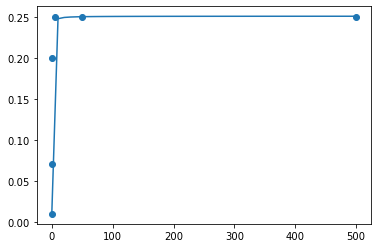

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

S = np.array([ 500, 50, 5, 0.5, 0.05, 0.005])
V0 = np.array([0.25, 0.25, 0.25, 0.2, 0.071, 0.0096])

Y = 1/V0
X = 1/S

modelo = stats.linregress(X, Y)

print(modelo)

Vmax = 1/modelo.intercept
Km = modelo.slope*Vmax

print(f'Vmax = {Vmax} e Km = {Km}')

plt.scatter(S, V0)
SS = np.linspace(0.005, 500)
V = Vmax*SS/(Km + SS)
plt.plot(SS, V)